# Loan Prediction Problem Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# load dataset

In [2]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



# checking the null value inside the dataset

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# find the types of values in each columns

In [7]:
for i in df:
    print(i)
    m=df[i].value_counts()
    print(m)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15


# MISSING VALUES HANDALING

In [8]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
ss=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
catcol=df.select_dtypes("object")
intcol=df.select_dtypes(["Int64","float64"])

In [9]:
df["Dependents"].replace("3+",3,inplace=True)


In [10]:
print(f" catcol{catcol.isna().sum()}\n intcol {intcol.isna().sum()}")

 catcolLoan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64
 intcol ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64


In [11]:
for i in catcol:
    df[i]=ss.fit_transform(df[[i]])
for a in intcol:
     df[a]=si.fit_transform(df[[a]])
    

In [12]:
df["Dependents"]=df["Dependents"].astype("int64")

# CHECKING COREALTION

In [13]:
df.corr().style.background_gradient()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [14]:
df.drop("Loan_ID",axis=1,inplace=True)

# SPLIT AS FEATURES AND TARGET

In [15]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(target)

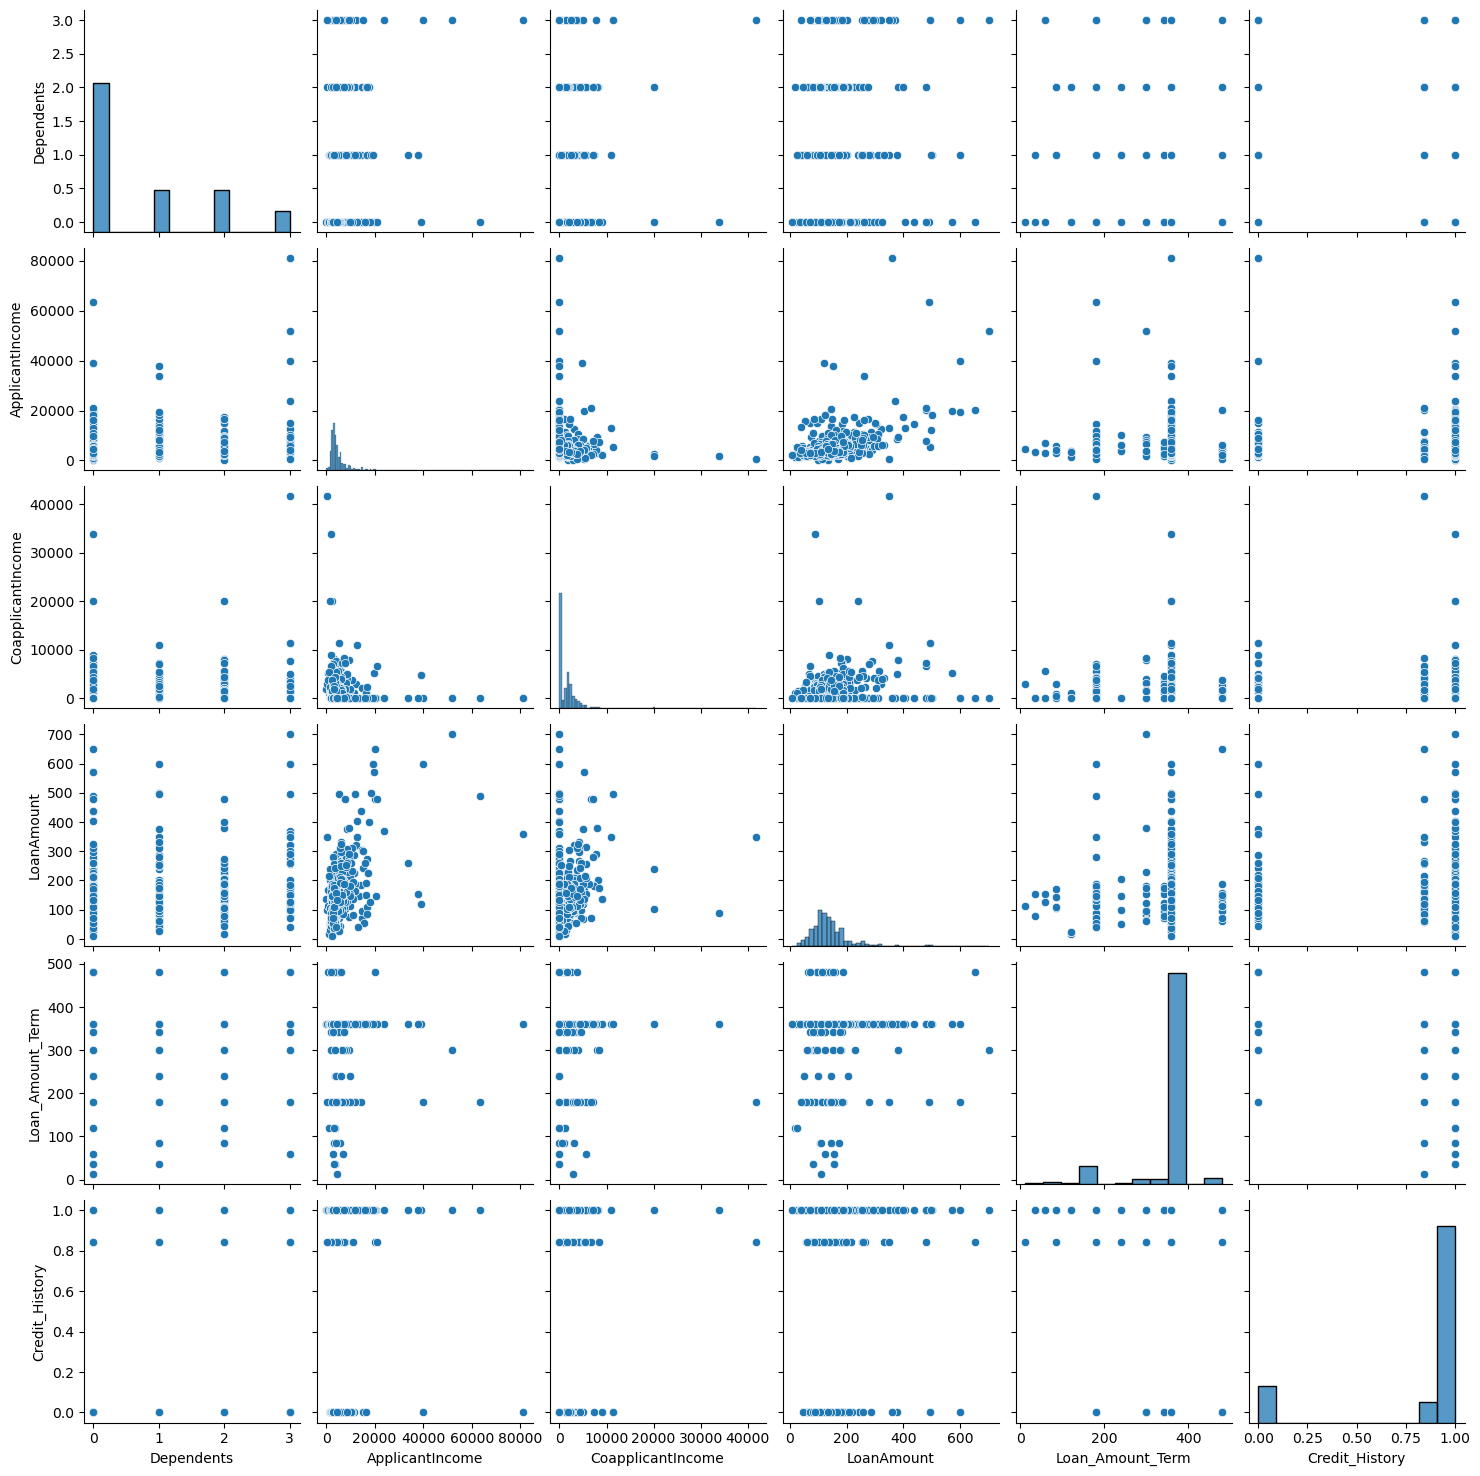

In [17]:
sns.pairplot(data=df)

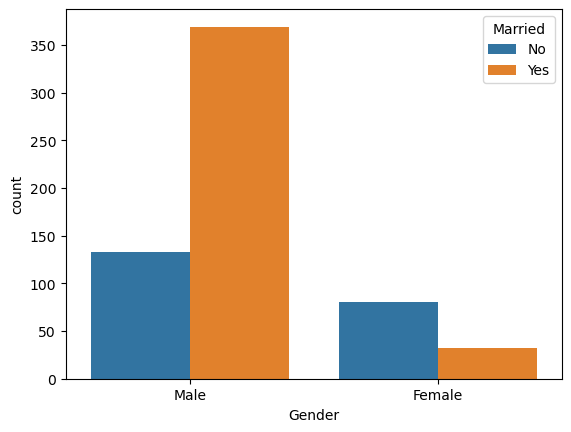

In [18]:
sns.countplot(x="Gender",hue="Married",data=df)
plt.show()

# OUTLIERS HANDALING

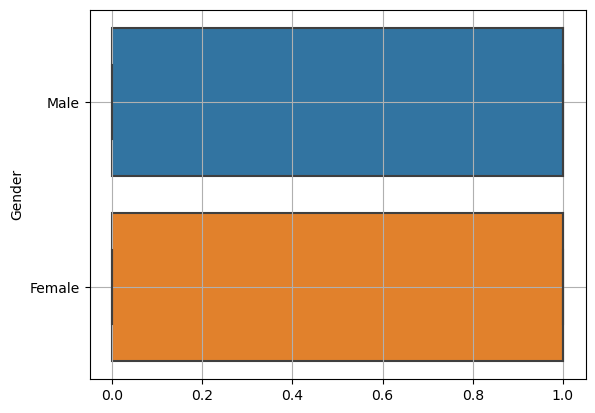

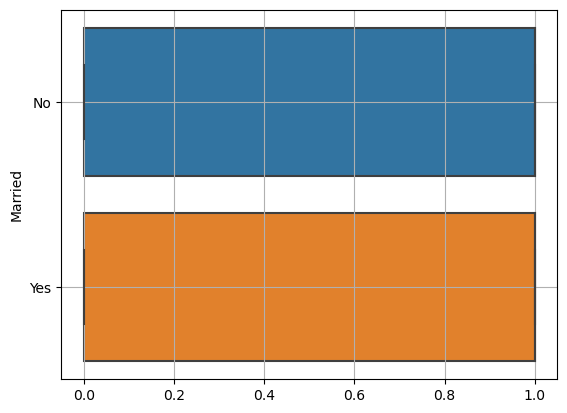

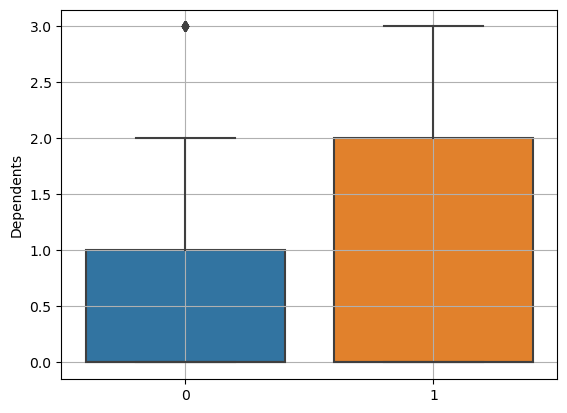

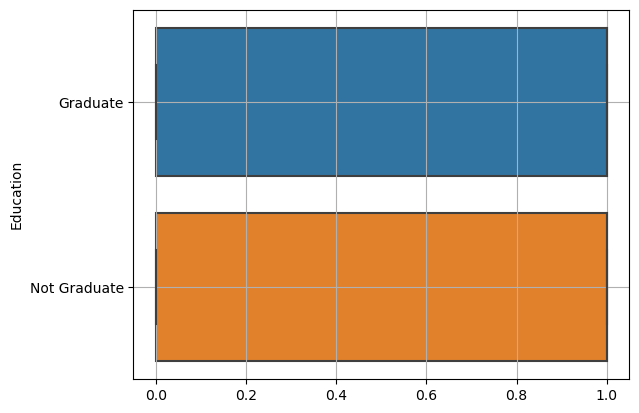

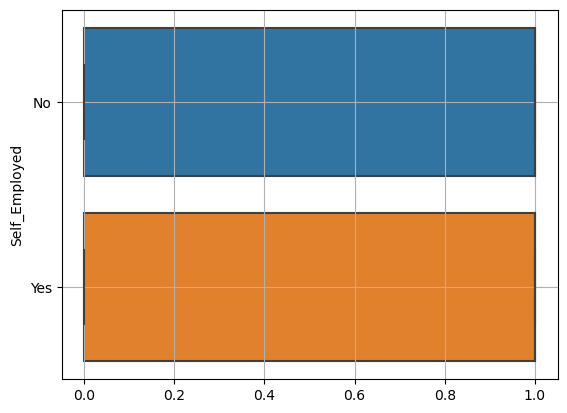

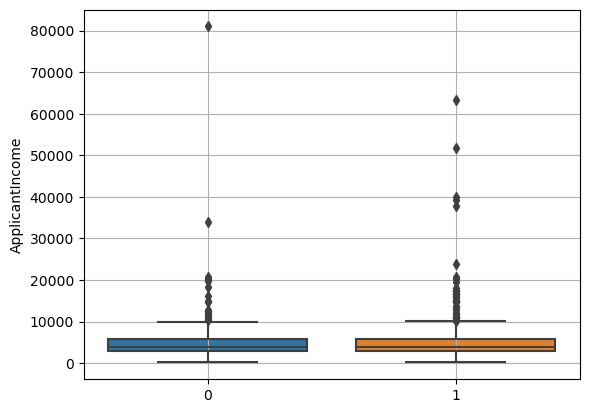

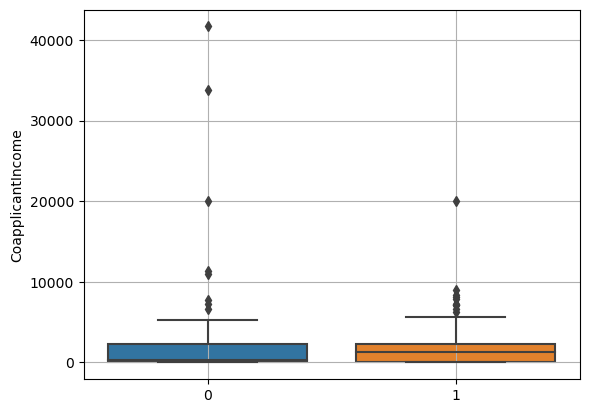

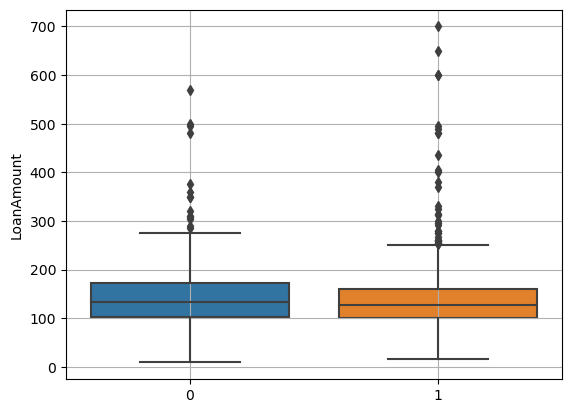

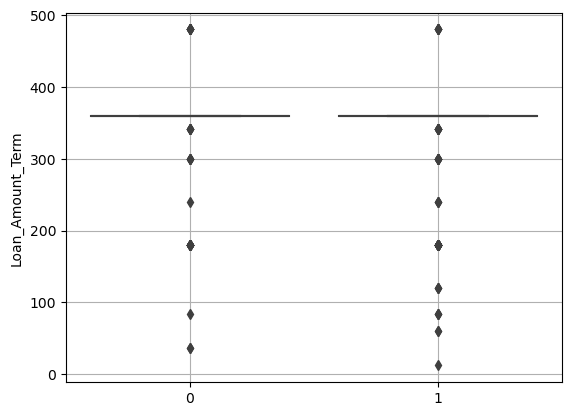

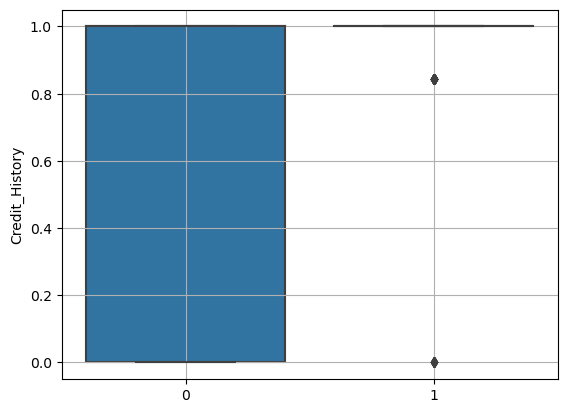

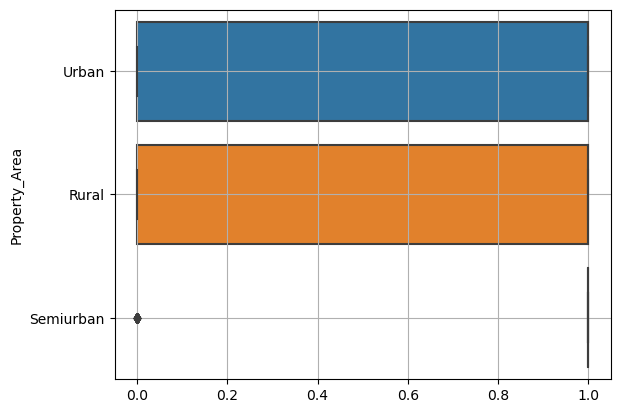

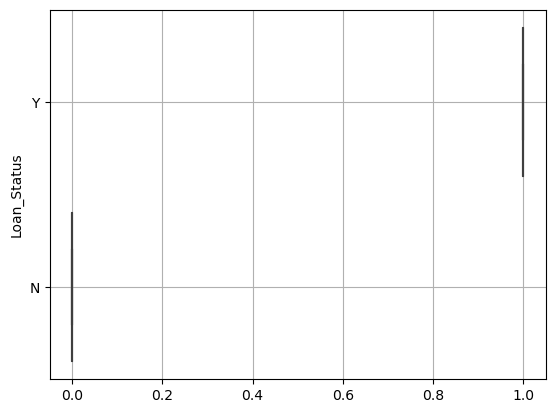

In [19]:
for col in df:
    plt.figure()
    sns.boxplot(data=df, x=target, y=df[col])
    plt.grid()
    plt.show()

In [20]:
f=features.select_dtypes(["int64","float64"])
fn=features.select_dtypes(["int64","float64"]).columns

In [21]:
fn

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

# SKEW

In [22]:
from scipy.stats import skew

Dependents
1.0130683122414248


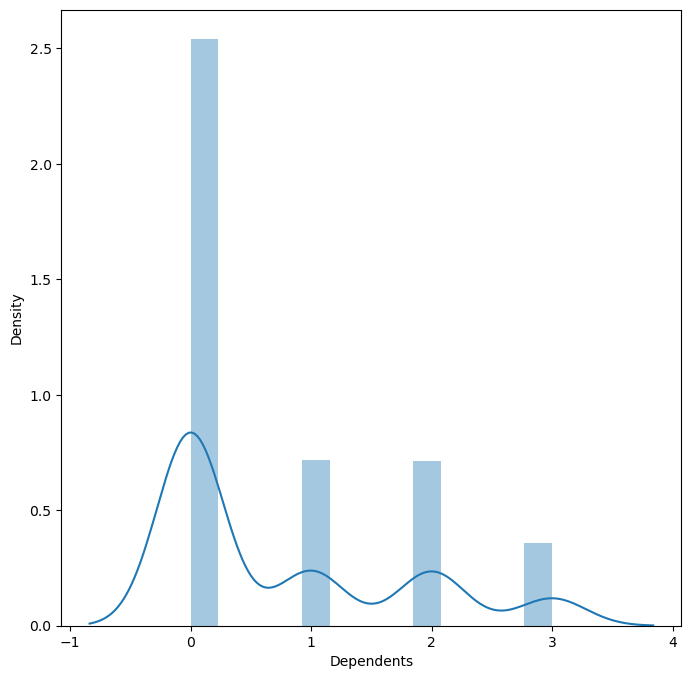

ApplicantIncome
6.523526250899361


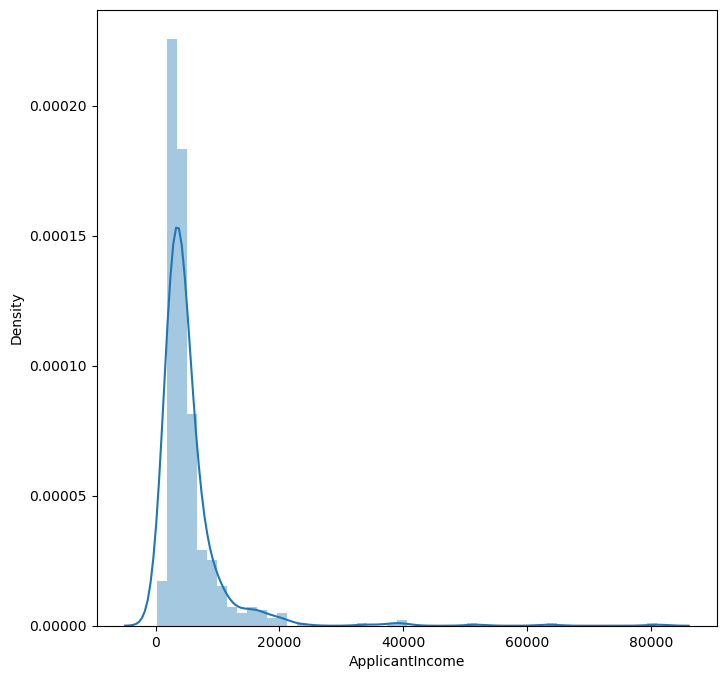

CoapplicantIncome
7.473216996340462


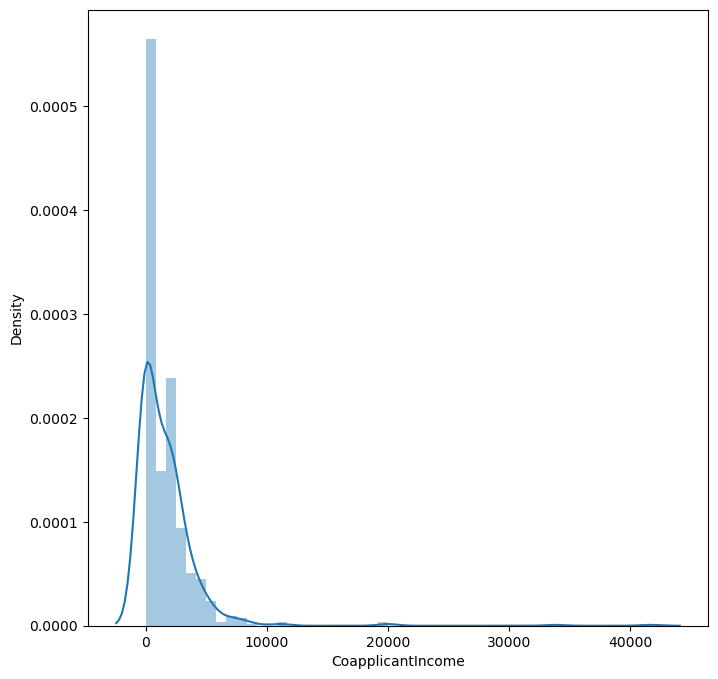

LoanAmount
2.719935540956202


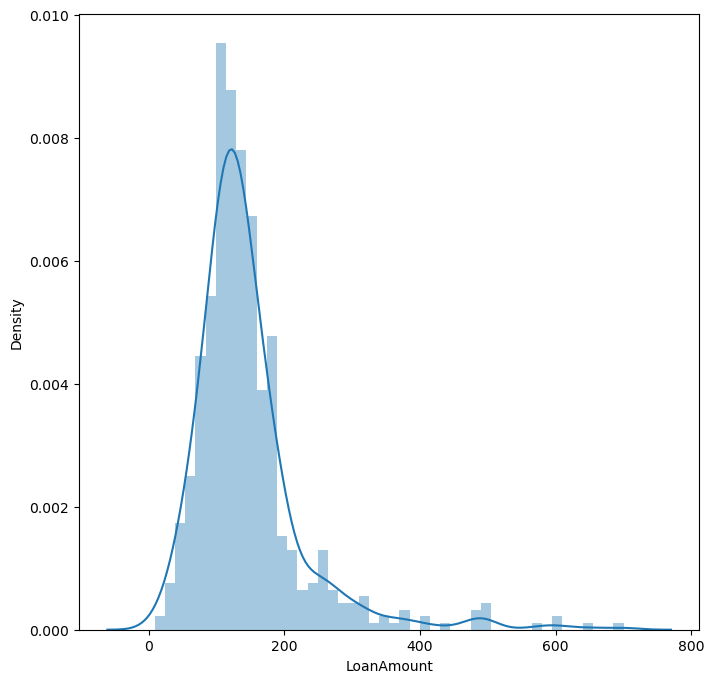

Loan_Amount_Term
-2.3838380001508668


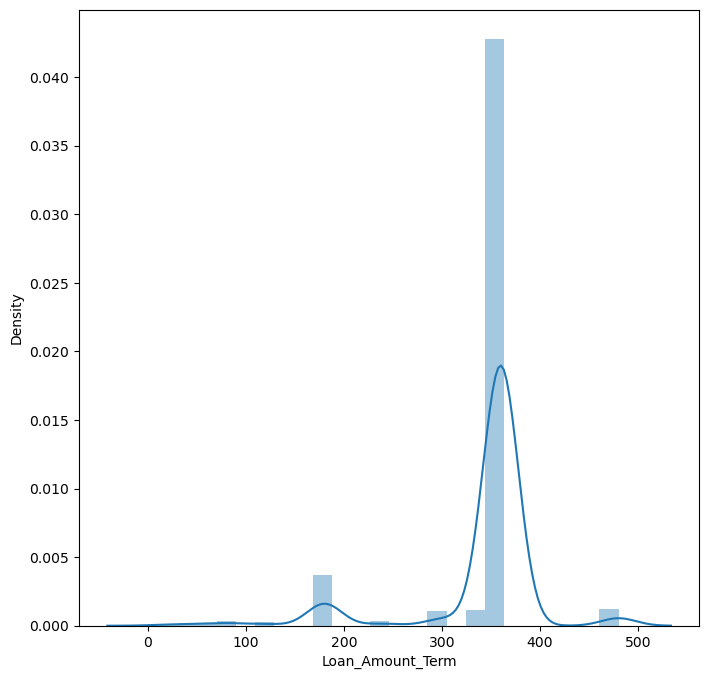

Credit_History
-1.9588001568214484


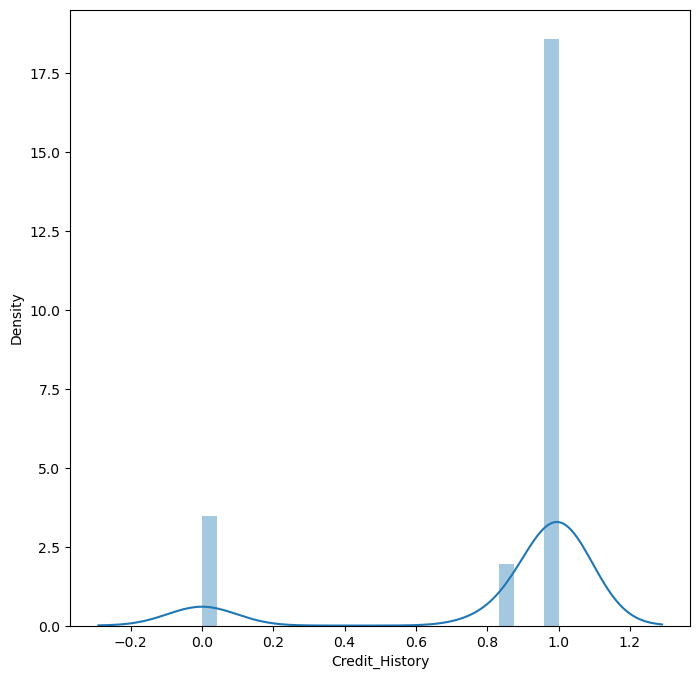

In [23]:
for i in fn:
    print(i)
    print(skew(features[i]))
    plt.figure(figsize=(8,8))
    sns.distplot(features[i])
    plt.show()

In [24]:
features["ApplicantIncome"]=np.log(features["ApplicantIncome"])
#features["CoapplicantIncome"]=np.log(features["CoapplicantIncome"])
features["LoanAmount"]=np.log(features["LoanAmount"])

Dependents
1.0130683122414248


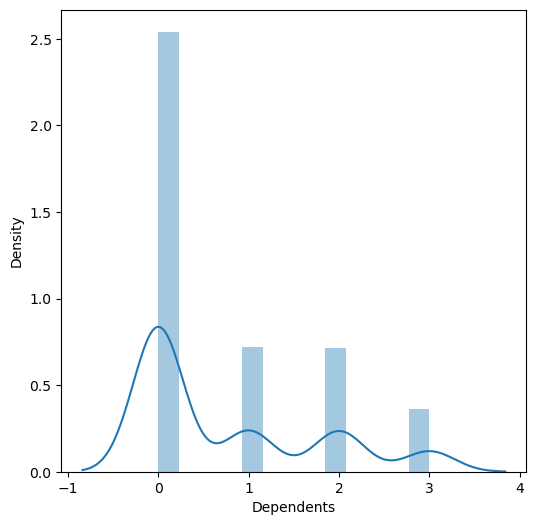

ApplicantIncome
0.47840756970181564


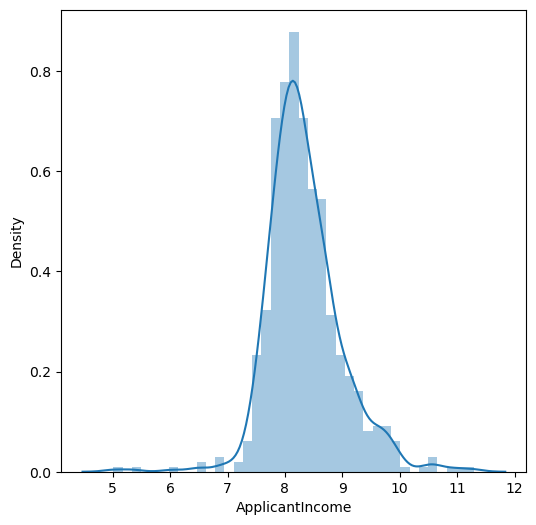

CoapplicantIncome
7.473216996340462


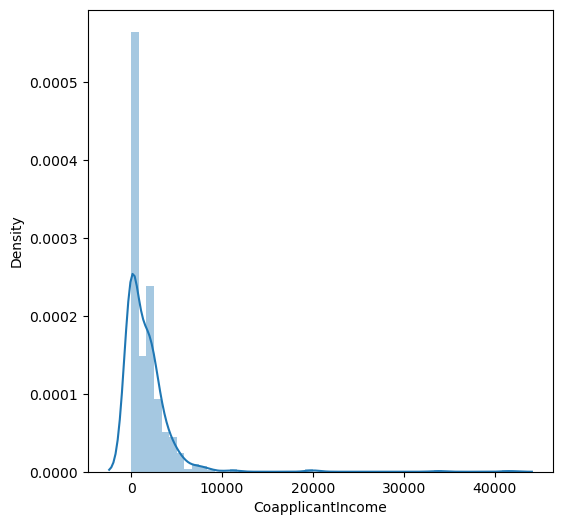

LoanAmount
-0.22268133414849556


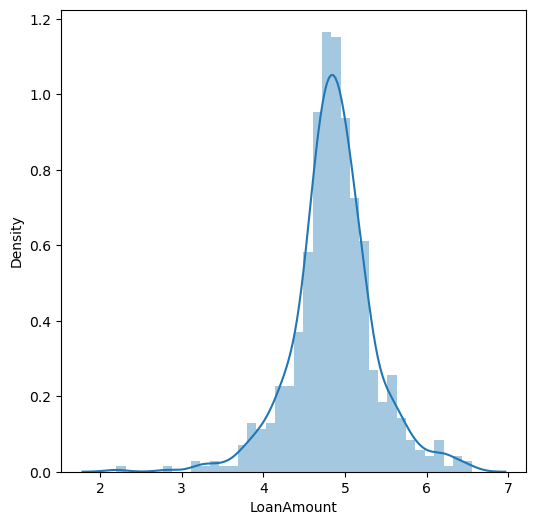

Loan_Amount_Term
-2.3838380001508668


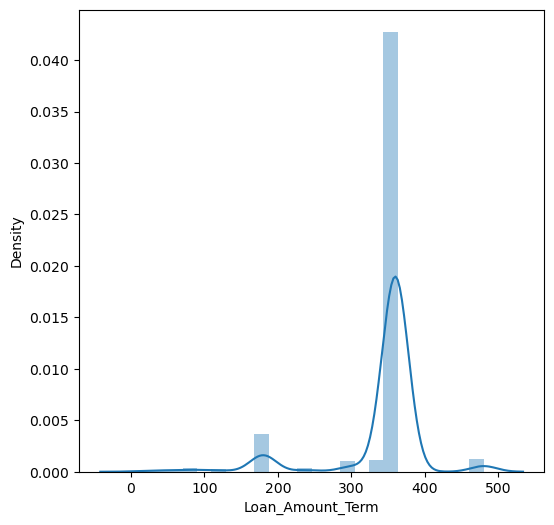

Credit_History
-1.9588001568214484


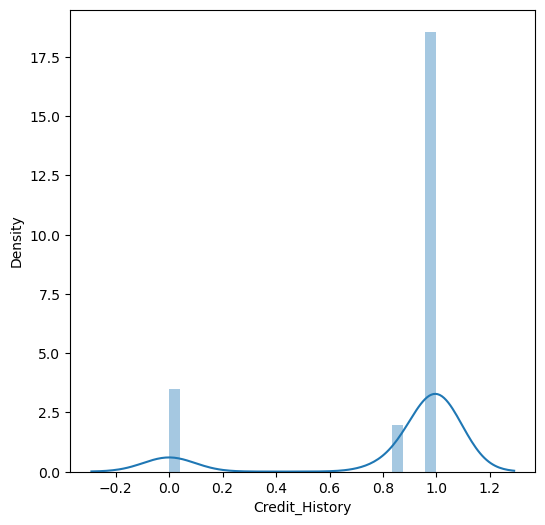

In [25]:
for i in fn:
    print(i)
    print(skew(features[i]))
    plt.figure(figsize=(6,6))
    sns.distplot(features[i])
    plt.show()

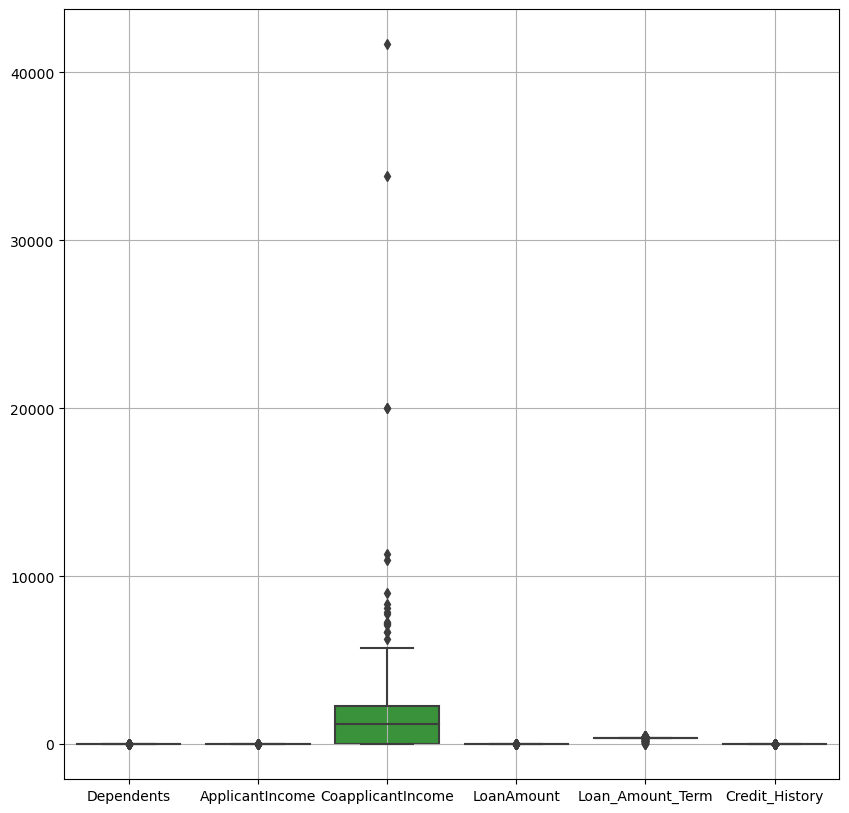

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features)
plt.grid()
plt.show()

# FIND OUTLIERS USING UPPER AND LOWER WHISKERS

In [27]:
def whiskers(col):
    q1=np.quantile(col,0.25)
    q3=np.quantile(col,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    return uw,lw

In [40]:
whiskers(features.CoapplicantIncome)

(5241.875, -3145.125)

In [41]:
c=features[features["CoapplicantIncome"]>=5241.875].index

In [42]:
cmean=features["CoapplicantIncome"].mean()

In [43]:
features.loc[c,"CoapplicantIncome"]=cmean

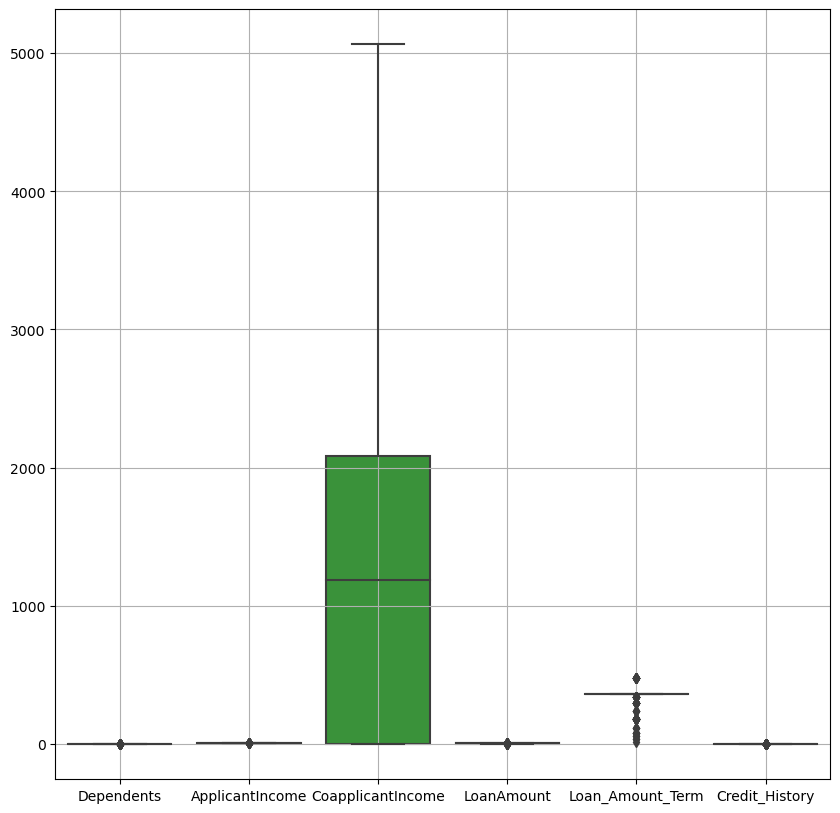

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features)
plt.grid()
plt.show()

In [46]:
fcol=features.select_dtypes("object").columns

# ENCODING

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[fcol]=oe.fit_transform(features[fcol])

# SCALEING

In [48]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
features=mm.fit_transform(features)

In [49]:
features=pd.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.582270,0.000000,0.640628,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.543501,0.297788,0.609760,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.476150,0.000000,0.457624,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.452363,0.465640,0.594936,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.586321,0.000000,0.631977,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.470762,0.000000,0.474397,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.526032,0.000000,0.342605,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.633470,0.047393,0.766255,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.623537,0.000000,0.696827,0.743590,1.0,1.0


# MODEL TRAINING

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=2)

# USER DEFIEND FUNCTION TO PASSING THE ALGORITHM

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
def algorithm(algo):
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    
    train=algo.score(xtrain,ytrain)
    test=algo.score(xtest,ytest)
    print(f"TrainingAccuracy: {train}\n Testin Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    return algo
from sklearn.metrics import classification_report   

In [52]:
dt=algorithm(DecisionTreeClassifier())

TrainingAccuracy: 1.0
 Testin Accuracy: 0.6260162601626016


              precision    recall  f1-score   support

           0       0.40      0.36      0.38        39
           1       0.72      0.75      0.73        84

    accuracy                           0.63       123
   macro avg       0.56      0.55      0.56       123
weighted avg       0.62      0.63      0.62       123



In [53]:
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

# GRIDSEARCH CV

In [54]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entr

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [55]:
grid.best_score_

0.8187590187590189

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)

In [57]:
dt = algorithm(grid.best_estimator_)

TrainingAccuracy: 0.8207739307535642
 Testin Accuracy: 0.7723577235772358


              precision    recall  f1-score   support

           0       0.79      0.38      0.52        39
           1       0.77      0.95      0.85        84

    accuracy                           0.77       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.78      0.77      0.75       123



# IMPORT MULTIPLE ALGORIHM

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# PASS THE ALGORITHM THROUNG THE FUNCTION

In [59]:
kn=algorithm(KNeighborsClassifier())

TrainingAccuracy: 0.8187372708757638
 Testin Accuracy: 0.7642276422764228


              precision    recall  f1-score   support

           0       0.81      0.33      0.47        39
           1       0.76      0.96      0.85        84

    accuracy                           0.76       123
   macro avg       0.78      0.65      0.66       123
weighted avg       0.77      0.76      0.73       123



In [60]:
lg=algorithm(LogisticRegression())

TrainingAccuracy: 0.8187372708757638
 Testin Accuracy: 0.7723577235772358


              precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weighted avg       0.79      0.77      0.74       123



In [61]:
sv=algorithm(SVC())

TrainingAccuracy: 0.8187372708757638
 Testin Accuracy: 0.7723577235772358


              precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weighted avg       0.79      0.77      0.74       123

